## Simulating a Mixed State
A mixed state is not the same as a superposition. It’s a classical probability distribution over quantum states.

In this case we have that:
- With 25% chance, the system is in 
$`|w_1\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)`$

- With 75% chance, it’s in
$`|w_2\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)`$

We are not preparing:
$`|\psi\rangle = \sqrt{\frac{1}{4}}|w_1\rangle + \sqrt{\frac{3}{4}}|w_2\rangle`$

That would be a pure superposition, which is totally different.
Any quantum state — pure or mixed — can be described using a density matrix.
- For a pure state: $`\rho = |\psi\rangle\langle\psi|`$
- For a mixed state: $`\rho = \sum_i p_i |\psi_i\rangle\langle\psi_i|`$




In [ ]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.quantum_info import DensityMatrix

# Define the pure states |w1> and |w2>

def w1_circuit():
    qc = QuantumCircuit(1)
    qc.h(0)  # |w1> = H|0> = (|0> + |1>)/sqrt(2)
    return qc

def w2_circuit():
    qc = QuantumCircuit(1)
    qc.x(0) # So that it becomes |1>
    qc.h(0)  # X then H gives (|0> - |1>)/sqrt(2)
    return qc


psi_w1 = DensityMatrix(w1_circuit())
psi_w2 = DensityMatrix(w2_circuit())

# Create the mixed state: 1/4 * |w1><w1| + 3/4 * |w2><w2|
rho = 0.25 * psi_w1 + 0.75 * psi_w2

# Display the density matrix
print("Density Matrix:")
print(rho.data)

print("Purity: ", rho.purity()) # Purity is calculated as Tr(rho^2)
print("Trace: ", rho.trace())  # Should be 1 for a valid density matrix
print("Probabilities (computational basis state): ", rho.probabilities())
print("1000 Samples: ", rho.sample_counts(1000))
rho.draw('latex') 


Density Matrix:
[[ 0.5 +0.j -0.25+0.j]
 [-0.25+0.j  0.5 +0.j]]
Purity:  (0.6249999999999997+0j)
Trace:  (0.9999999999999998+0j)


QiskitError: 'Invalid input data format for DensityMatrix'

Diagonal terms  represent the probabilities of measuring:

$`|0\rangle: 50\%`$

$`|1\rangle: 50\%`$

These reflect the fact that both $|w_1\rangle$ and $|w_2\rangle$ are balanced in amplitude between $|0\rangle$ and $|1\rangle$.

Off-diagonal terms tell us about **coherence** (interference potential) between $|0\rangle$ and $|1\rangle $.

#### The off-diagonal terms in a density matrix do influence measurement outcomes, but only when you measure in a basis other than the one in which the matrix is diagonal.

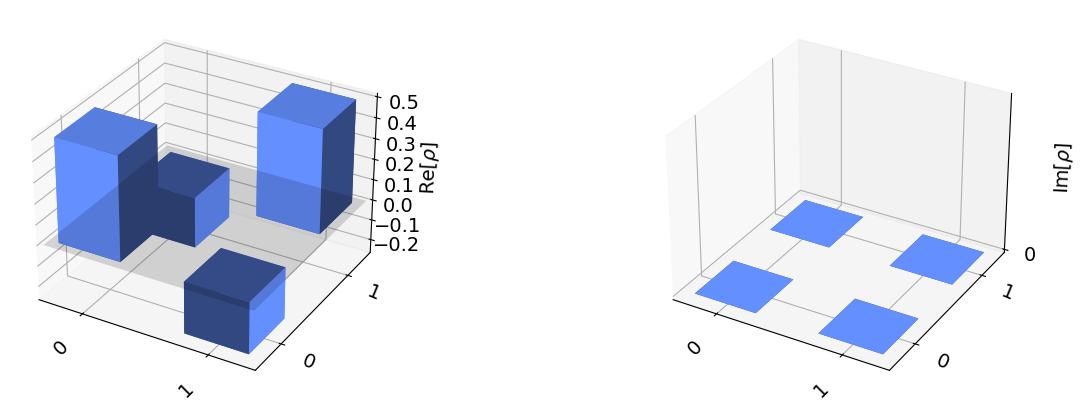

In [ ]:
rho.draw('city') 

/home/vscode/.cache/pypoetry/virtualenvs/quantum-studies-bgrKsKb0-py3.8/lib/python3.8/site-packages/qiskit/visualization/bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


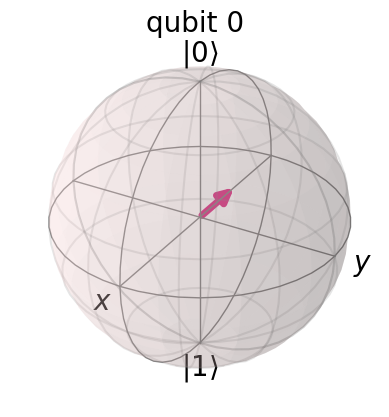

In [ ]:
rho.draw('bloch')  # Will show up within the Bloch sphere